In [1]:
!pip install pertpy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 118 kB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 139 kB 45.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 37.1 MB/s eta 0:00:01
     |████████████████████████████████| 8.4 MB 28.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 44.3 MB/s eta 0:00:01
     |████████████████████████████████| 108 kB 46.5 MB/s eta 0:00:01
     |████████████████████████████████| 91 kB 44.5 MB/s eta 0:00:01
     |████████████████████████████████| 224 kB 46.5 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 49.9 MB/s eta 0:00:01
     |████████████████████████████████| 8.8 MB 192 kB/s eta 0:00:011
     |████████████████████████████████| 292 kB 72.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 40.4 MB/s eta 0:00:01
     |████████████████████████████████| 973 kB 45.0 MB/s eta 0:00:01
     |██████████████████████████

     |████████████████████████████████| 166 kB 69.3 MB/s eta 0:00:01
     |████████████████████████████████| 73 kB 70.0 MB/s eta 0:00:01
     |████████████████████████████████| 74 kB 49.4 MB/s eta 0:00:01
     |████████████████████████████████| 59.9 MB 43.3 MB/s eta 0:00:01
     |████████████████████████████████| 335 kB 44.2 MB/s eta 0:00:01
     |████████████████████████████████| 386 kB 45.6 MB/s eta 0:00:01
     |████████████████████████████████| 708 kB 42.0 MB/s eta 0:00:01


     |████████████████████████████████| 5.5 MB 43.7 MB/s eta 0:00:01
     |████████████████████████████████| 13.0 MB 39.8 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 69.6 MB/s eta 0:00:01
     |████████████████████████████████| 6.6 MB 41.5 MB/s eta 0:00:01


     |████████████████████████████████| 269 kB 44.5 MB/s eta 0:00:01
     |████████████████████████████████| 840 kB 41.0 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 33.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 42.0 MB/s eta 0:00:01
  Created wheel for adjusttext: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=869dff0bceaac96af362ba57e07161d27d473c7b1190ca1c17d0c78d723d281d
  Stored in directory: /tmp/pip-ephem-wheel-cache-rlzdfd3e/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492037 sha256=a998a40eb08f341936ad4f1c78a80d48e99f4d27e0abe2045b05444ff8b576f3
  Stored in directory: /tmp/pip-ephem-wheel-cache-rlzdfd3e/wheels/a0/0b/ee/e6994fadb42c1354dcccb139b0bf2795271bddfe6253ccdf11
  Created wheel for toyplot: filename=toyplot-1.0.3-py3-none-any.whl size=284048 sha256=ef9175bd4ae634109f8b2c93ec67819cd5267679813ee210e167db75e29cd7db
  Stored in

(might have to uninstall and reinstall seaborn here)

In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns

from utils import annotate, scanpy_setup, ctrl_categories_setup
from utils import sample_and_merge_control, remove_groups, subsample, generate, get_flat_df, normalize_per_metric
from utils import get_distance_per_perturbation, add_rank_col

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import pertpy as pt

Installed version 0.4.0 of pertpy is outdated. Newest version is 0.5.0!

/usr/local/lib/python3.8/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.8/dist-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
Global seed set to 0
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pyto

ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

To use sccoda or tasccoda please install ete3 with pip install ete3

In [3]:
sc.set_figure_params(dpi=100, frameon=False, facecolor=None)

Load in the main simulation dataset. This contains a large variety of conditions generated with different degrees of perturbation and foldchanges, and some variation in control.

In [4]:
adata = ad.AnnData(pd.read_csv('../splatter_sim.csv').T, obs=pd.read_csv('../splatter_sim_obs.csv'))

Map simulation parameters to groups, and set the `perturbation` label column.

In [5]:
# def annotate(adata, params):
#     """Adds metadata annotations and a 'perturbation' column to SplatteR simulated data."""
#     adata.obs['group'] = [x.split('Path')[1] for x in adata.obs.Group.values]
#     for col in params.columns:
#         adata.obs[col] = adata.obs.group.map(dict(zip(params.index.astype(str), params[col])))

#     adata.obs['log(DEProb)'] = np.log10(adata.obs.DEProb.values)
#     adata.obs['perturbation'] = adata.obs.Group.replace({'Path1': 'control'})
    
params = pd.read_csv('../splatter_sim_params.csv')
annotate(adata, params)

Standard scanpy functions needed for calculating distances.

In [6]:
# def scanpy_setup(adata):
#     """In-place."""
#     adata.layers['counts'] = adata.X.copy()
#     sc.pp.normalize_total(adata, target_sum=1e6, exclude_highly_expressed=True)
#     sc.pp.log1p(adata)
#     sc.pp.highly_variable_genes(adata, n_top_genes=5000)
#     sc.pp.pca(adata, use_highly_variable=True)
    
scanpy_setup(adata)

Calculate leiden clusters so that we have 5 groups in the control condition.

In [7]:
# have to do this manually because the `restrict_to` option isn't working
# def ctrl_categories_setup(adata, resolution):
#     """In-place."""
#     ctrl_adata = adata[adata.obs.perturbation == 'control']
#     sc.pp.neighbors(ctrl_adata)
#     sc.tl.leiden(ctrl_adata, resolution=resolution)
    
#     print(ctrl_adata.obs.leiden.value_counts())
    
#     # set values in original adata
#     adata.obs['leiden'] = np.nan
#     adata.obs['leiden'][ctrl_adata.obs.index] = ctrl_adata.obs['leiden'].values

ctrl_categories_setup(adata, resolution=.85)

0    4873
1    4688
2    2452
3    2045
4    1451
5     568
6       5
Name: leiden, dtype: int64


In summary, our adata now looks like this.

In [8]:
adata

AnnData object with n_obs × n_vars = 40000 × 10000
    obs: 'Cell', 'Batch', 'Group', 'ExpLibSize', 'Step', 'group', 'Prob', 'DEProb', 'DownProb', 'FacLoc', 'FacScale', 'Steps', 'Skew', 'log(DEProb)', 'perturbation', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'

### sanity checks

Plot what these simulated perturbations look like.

Check that the mean-variance relationship we'd expect is preserved.

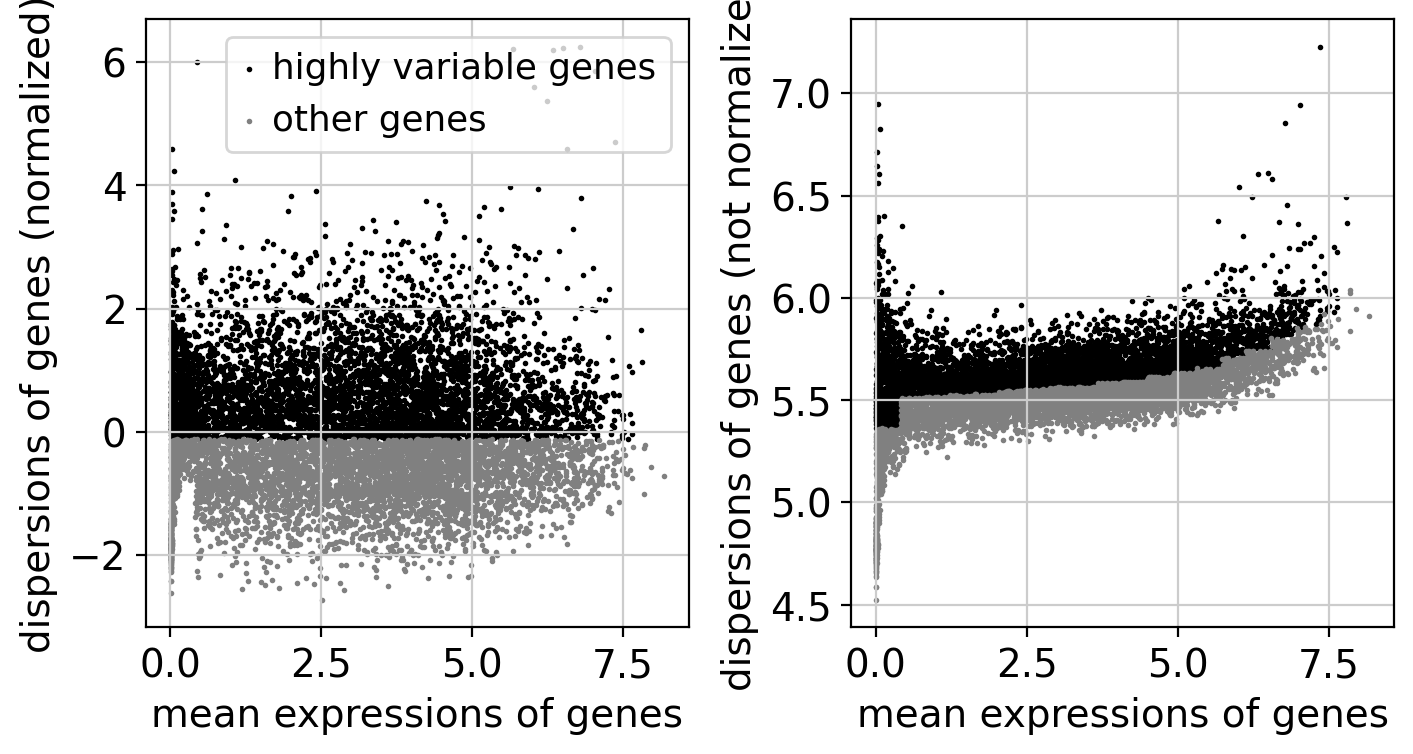

In [15]:
sc.pl.highly_variable_genes(adata)

In [11]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

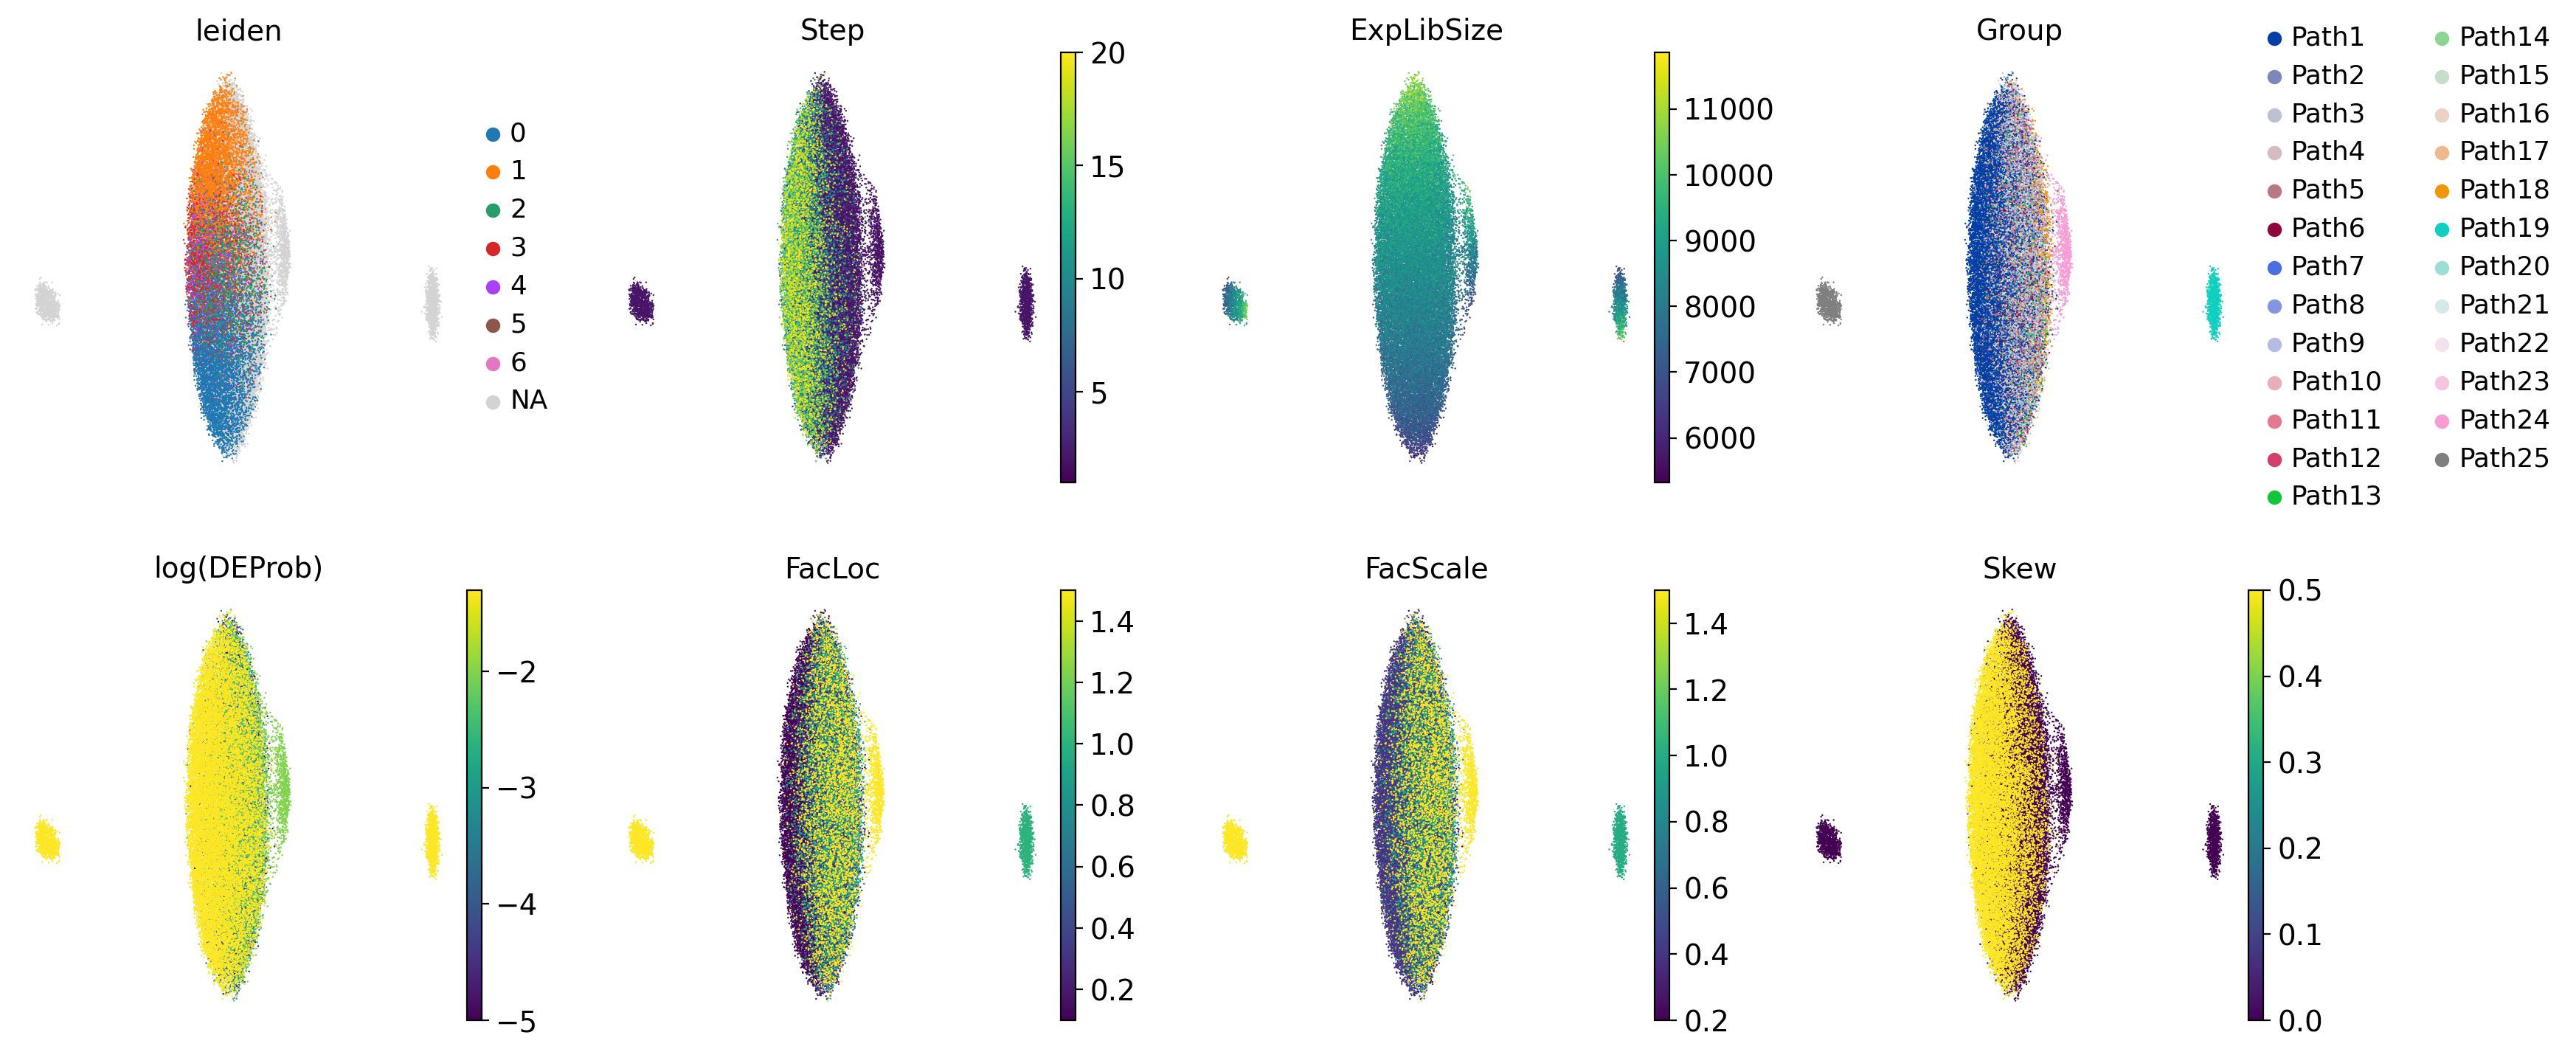

In [14]:
sc.pl.umap(adata, color=['leiden', 'Step', 'ExpLibSize', 'Group', 'log(DEProb)', 'FacLoc', 'FacScale', 'Skew'], ncols=4)

Double check that the number of differentially expressed genes increases. Note that we don't expect differential testing to be sensitive enough for the first few conditions set to be subtle perturbations.

In [16]:
sc.tl.rank_genes_groups(adata, groupby='Group', reference='Path1')

In [17]:
results = []

for group in adata.obs.Group.cat.categories:
    if group == 'Path1':
        continue
    df = sc.get.rank_genes_groups_df(adata, group=group)
    fc_count = df[np.abs(df.logfoldchanges) > 1].shape[0]
    pos_fc_count = df[df.logfoldchanges > 0].shape[0]
    results.append({'Group': group, 'fc_count': fc_count, 'pos_fc_count': pos_fc_count})

# Create a DataFrame from the results list
result_df = pd.DataFrame(results)

result_df

Group  fc_count  pos_fc_count
0    Path2      1067          4718
1    Path3      1066          4771
2    Path4      1116          4751
3    Path5      1083          4649
4    Path6      1091          4618
5    Path7      1210          4245
6    Path8      1061          4533
7    Path9      1112          4670
8   Path10      1085          4486
9   Path11      1101          4393
10  Path12      1119          4432
11  Path13      1289          3987
12  Path14      1030          4607
13  Path15      1083          4643
14  Path16      1096          4666
15  Path17      1105          4553
16  Path18      1150          4208
17  Path19      1461          3334
18  Path20      1098          4623
19  Path21      1056          4671
20  Path22      1090          4668
21  Path23      1066          4651
22  Path24      1169          4453
23  Path25      1550          2348

Dunno why the number of positive changes goes down, but okay.

### PowSimR

These simulated datasets have been generated where dropout = f(mean).

In [17]:
path = '/dss/dsshome1/02/di93zoj/yuge/powsimR_simulations'

In [8]:
# params = {
#     '0.5_2',
#     '0.5_2_0'
# }

# dfs = []
# for p in params:
#     df = pd.read_csv(f'{path}/sparsity/{p}_data.csv').T
#     dfs.



ENSMUSG00000046338_1  ENSMUSG00000050107_2  ENSMUSG00000081534_3  \
S1_n1                       3                     0                     2   
S2_n1                       1                     2                     0   
S3_n1                       3                     0                     1   
S4_n1                       0                     0                     1   
S5_n1                       2                     0                     0   
...                       ...                   ...                   ...   
S238_n2                     5                     8                     0   
S239_n2                     1                     6                     3   
S240_n2                     7                     2                     4   
S241_n2                    19                     8                     8   
S242_n2                     6                    10                     6   

         ENSMUSG00000042203_4  ENSMUSG00000024207_5  ENSMUSG00000043807_6  \
S1_n1                       2                     0                     0   
S2_n1                       2                     0                     0   
S3_n1                       0                     1                     0   
S4_n1                       0                     0                     0   
S5_n1                       0                     0                     0   
...                       ...                   ...                   ...   
S238_n2                     3                     1                     0   
S239_n2                     4                     0                     0   
S240_n2                     5                     0                     0   
S241_n2                     0                     0                     0   
S242_n2                     2                     0                     0   

         ENSMUSG00000002265_7  ENSMUSG00000031710_8  ENSMUSG00000050619_9  \
S1_n1                       0                     0                     0   
S2_n1                       2                     0                     0   
S3_n1                       8                     4                     0   
S4_n1                       5                     0                     1   
S5_n1                       1                     0                     2   
...                       ...                   ...                   ...   
S238_n2                     3                     0                    10   
S239_n2                     0                     0                     3   
S240_n2                     7                     0                    11   
S241_n2                     0                     1                    13   
S242_n2                     5                     0                     2   

         ENSMUSG00000081992_10  ...  ENSMUSG00000022487_9991  \
S1_n1                        0  ...                        1   
S2_n1                        0  ...                        1   
S3_n1                        0  ...                        0   
S4_n1                        0  ...                        0   
S5_n1                        0  ...                        0   
...                        ...  ...                      ...   
S238_n2                      0  ...                        4   
S239_n2                      0  ...                        9   
S240_n2                      3  ...                        7   
S241_n2                      0  ...                        5   
S242_n2                      1  ...                        3   

         ENSMUSG00000030074_9992  ENSMUSG00000026131_9993  \
S1_n1                          0                        9   
S2_n1                          0                       12   
S3_n1                          0                       10   
S4_n1                          0                        3   
S5_n1                          0                        8   
...                          ...                      ...   
S238_n2                        0      

In [18]:
adata = ad.AnnData(
    pd.concat([
        pd.read_csv(f'{path}/sparsity/0.05_2_data.csv').T,
        pd.read_csv(f'{path}/sparsity/0.05_2_0_data.csv').T
]))
adata.X = np.nan_to_num(adata.X)
adata.obs['sample'] = ['first']*400 + ['second']*142
adata.obs['perturbation'] = [x.split('_')[1] for x in adata.obs_names]
adata.obs['perturbation'] = adata.obs['perturbation'].map({'n1': 'control', 'n2': 'pert'})
adata.obs['ps'] = adata.obs.perturbation.astype(str) + '_' + adata.obs['sample'].astype(str)

/tmp/ipykernel_3846511/1590885184.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(
/dss/dsshome1/02/di93zoj/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [20]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=5000, subset=True)
sc.pp.pca(adata, use_highly_variable=True)
sc.pp.neighbors(adata)
# sc.tl.pca(adata)
sc.tl.umap(adata)

/dss/dsshome1/02/di93zoj/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


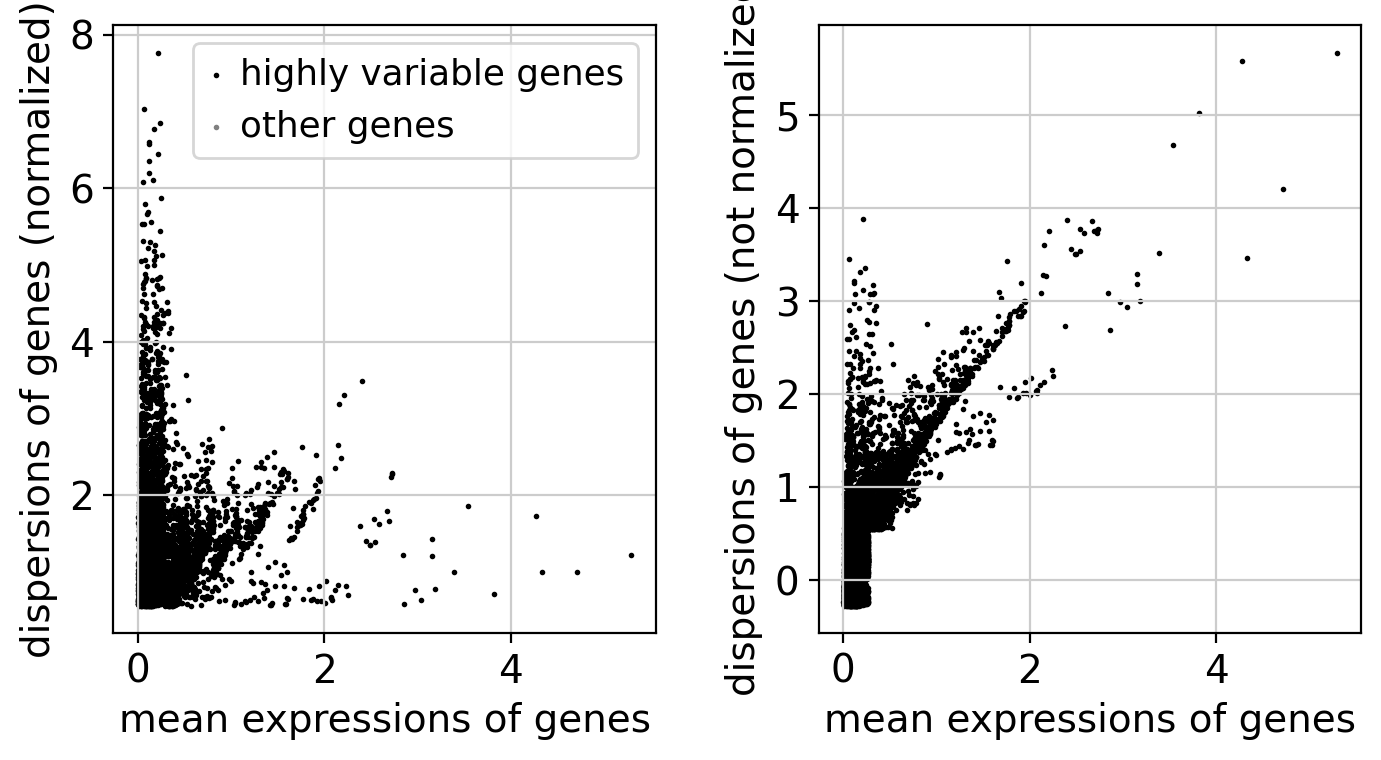

In [21]:
sc.pl.highly_variable_genes(adata)

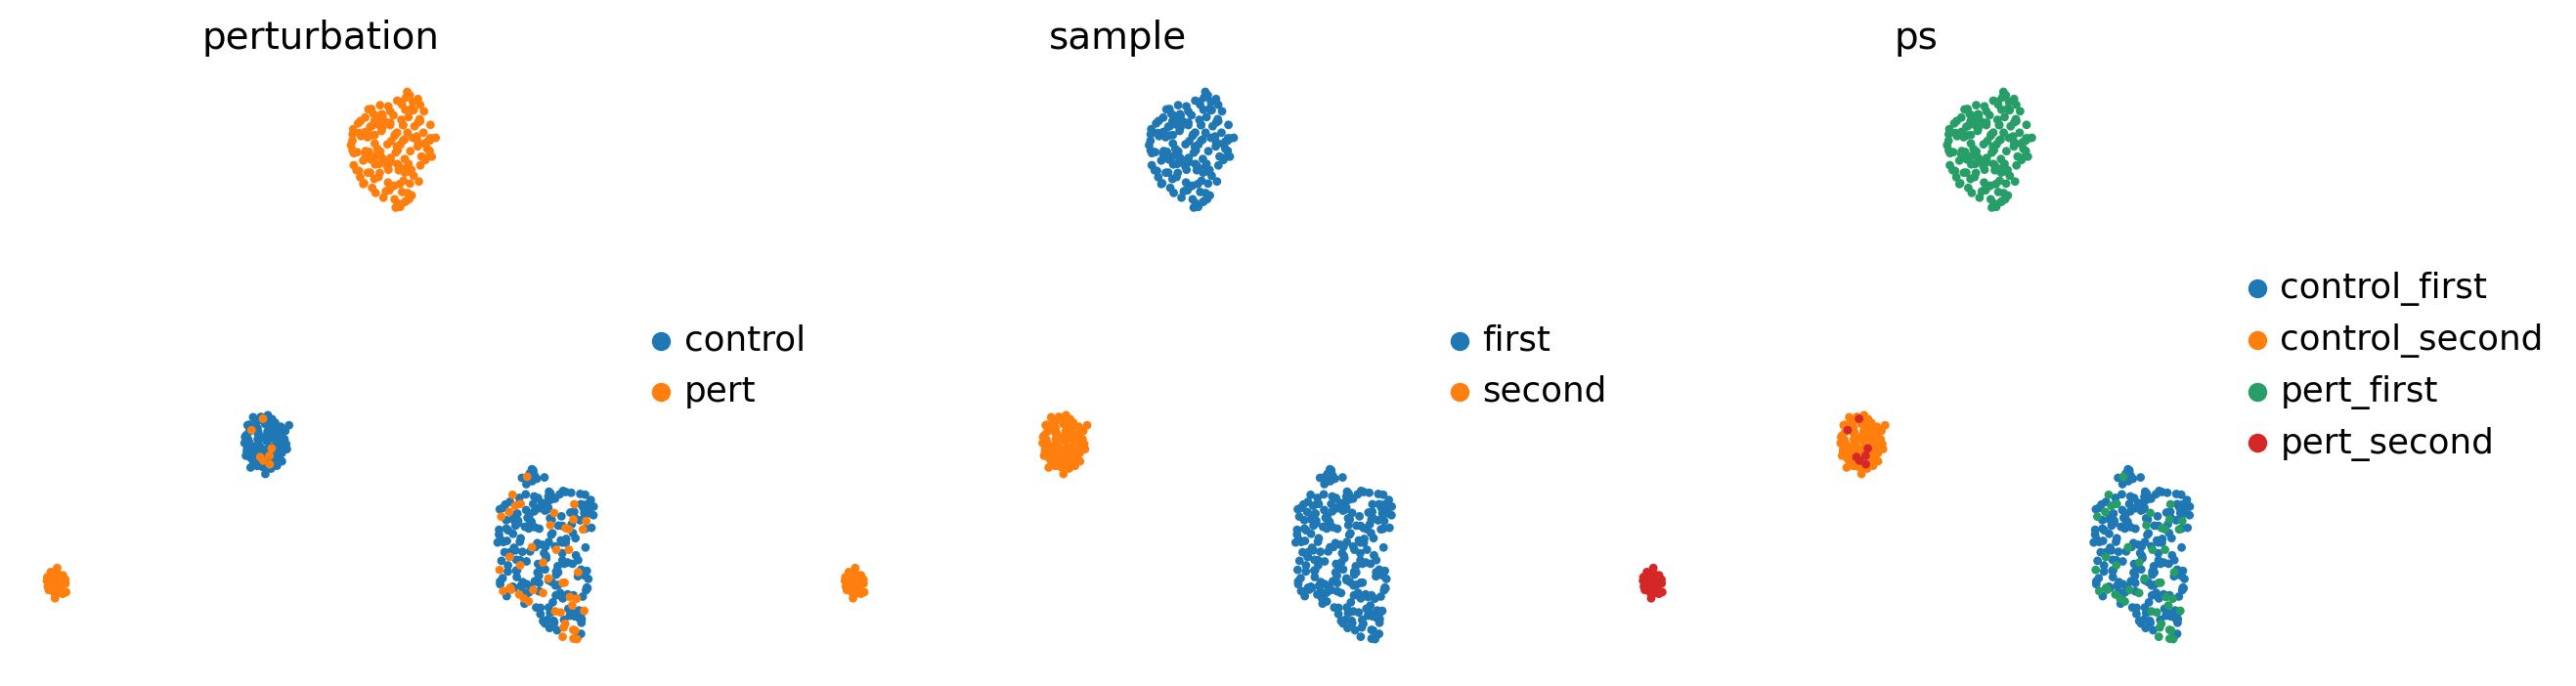

In [8]:
sc.pl.umap(adata, color=['perturbation', 'sample', 'ps'], size=40)

In [9]:
import os
for file in os.listdir(f'{path}/sparsity/'):
    if '0_data.csv' in file:  # smaller samples
        pass
    

['0.05_0.1_data.csv',
 '0.5_1_0_data.csv',
 '0.005_2_0_data.csv',
 '0.01_1_data.csv',
 '0.01_2_data.csv',
 '0.05_0.2_0_data.csv',
 '0.05_0.1_0_data.csv',
 '0.5_0.5_data.csv',
 '0.005_0.2_0_data.csv',
 '0.001_0.2_data.csv',
 '0.5_2_data.csv',
 '0.05_2_data.csv',
 '0.5_0.2_data.csv',
 '0.1_2_data.csv',
 '0.1_0.1_0_data.csv',
 '0.5_1_data.csv',
 '0.01_0.1_data.csv',
 '0.05_1_0_data.csv',
 '0.001_1_0_data.csv',
 '0.005_2_data.csv',
 '0.5_0.1_data.csv',
 '0.1_0.1_data.csv',
 '0.05_2_0_data.csv',
 '0.1_0.5_data.csv',
 '0.1_1_0_data.csv',
 '0.005_1_data.csv',
 '0.001_2_data.csv',
 '0.005_1_0_data.csv',
 '0.5_0.5_0_data.csv',
 '0.05_0.5_data.csv',
 '0.001_0.2_0_data.csv',
 '0.1_0.2_data.csv',
 '0.001_1_data.csv',
 '0.005_0.5_data.csv',
 '0.001_2_0_data.csv',
 '0.001_0.5_0_data.csv',
 '0.1_1_data.csv',
 '0.001_0.1_0_data.csv',
 '0.01_0.5_data.csv',
 '0.005_0.1_data.csv',
 '0.5_2_0_data.csv',
 '0.1_2_0_data.csv',
 '0.05_1_data.csv',
 '0.005_0.2_data.csv',
 '0.01_0.2_data.csv',
 '0.01_0.1_0_data.

### utility functions

In [220]:
# # def sample_and_merge_control(adata, control):
# #     """
# #     Randomly sample control data and merge it with the original dataset.

# #     Parameters
# #     ----------
# #     adata : anndata.AnnData
# #         Anndata dataset with `'perturbation'` in .obs.
# #     control : anndata.AnnData
# #         Anndata dataset containing control data.

# #     Returns
# #     -------
# #     anndata.AnnData
# #         A new Anndata dataset with the sampled control data merged into the original dataset.
# #         The `perturbation` column is updated to mark which are the sampled cells.
# #     """
# #     indices = list(control.obs.index)
# #     np.random.shuffle(indices)

# #     # floor division and relabel as 5 different conditions
# #     n = 5
# #     n_per_control = control.shape[0] // n
# #     new = control[indices[:n_per_control*n]]  # equivalent to shuffling the control cells
# #     new_label = []
# #     for i in range(n):
# #         new_label += [f'control{i}']*n_per_control
# #     new.obs['perturbation'] = new_label

# #     return ad.concat([adata, new], join="outer")

# def sample_and_merge_control(adata, control, n=5):
#     """
#     Merge `n` control groups determined using leiden into the original adata,
#     labeled under `'perturbation'`.

#     Parameters
#     ----------
#     adata : AnnData
#     control : AnnData
#         Control dataset in AnnData format with 'leiden' clustering labels.
#     n : int, optional
#         Number of control categories (leiden clusters) to merge (default is 5).
#     """
#     control.obs['perturbation'] = control.obs['perturbation'].astype(str)
#     for cat in range(n):
#         idx = control[control.obs.leiden == str(cat)].obs.index
#         control.obs['perturbation'][idx] = 'control' + str(cat)
        
#     return ad.concat([adata, control], join='outer')

In [14]:
# def remove_groups(adata, min_cells):
#     """
#     Remove categories with fewer than `min_cells` cells.

#     Parameters
#     ----------
#     adata : anndata.AnnData
#         Anndata dataset with `'perturbation'` in .obs.
#     min_cells : int
#         The minimum number of cells (inclusive) required for a category to be kept.

#     Returns
#     -------
#     anndata.AnnData
#         A new Anndata dataset with perturbations that have at least `min_cells` cells.
#     """
#     group_counts = adata.obs["perturbation"].value_counts()
#     selected_groups = group_counts[group_counts >= min_cells].index
#     return adata[adata.obs["perturbation"].isin(selected_groups)]

In [15]:
# def subsample(adata, n_cells):
#     """
#     Subsample all perturbations to contain at most `n_cells`.

#     Parameters
#     ----------
#     adata : anndata.AnnData
#         The input Anndata dataset with `'perturbation'` in .obs.
#     n_cells : int
#         The maximum number of cells allowed for a perturbation after subsampling.

#     Returns
#     -------
#     anndata.AnnData
#         A new Anndata dataset with perturbations subsampled to contain at most the specified number of cells.
#     """
#     groups = adata.obs.groupby("perturbation").apply(lambda x: x.sample(n=n_cells, random_state=0, replace=False))
#     cells = [i for _, i in groups.index]
#     new = adata[adata.obs_names.isin(cells)]
#     return new

# def generate(cond, train, min_cells=500):
#     """
#     Filter perturbations with fewer than 500 cells and subsample each perturbation to ncell cells.

#     Parameters
#     ----------
#     cond : list
#         A list of integers representing different experimental scenarios (number of cells to subsample).
#     train : anndata.AnnData
#         The input Anndata dataset containing all conditions + `control`. Must have a column in `.obs`
#         named `'perturbation'`

#     Returns
#     -------
#     list
#         A list of Anndata datasets, each representing a different experimental scenario.
#     """
#     # Filter out perturbations with not enough cells
#     perturbation_counts = train.obs['perturbation'].value_counts()
#     filter_condition = perturbation_counts >= min_cells
#     filtered_train = train[train.obs['perturbation'].map(filter_condition)]
    
#     if filtered_train.shape[0] == 0:
#         raise ValueError(f'All conditions had fewer than {min_cells} cells.')

#     # Subsample ncell cells for each perturbation
#     groups = filtered_train.obs.groupby("perturbation").apply(lambda x: x.sample(n=ncell, random_state=1, replace=False))
#     selected_names = [name for _, name in groups.index]
#     new_train = filtered_train[groups.index.get_level_values(1)]

#     return new_train

In [376]:
# def get_flat_df(pwdfs, controls, label='condi'):
#     """
#     Transform a dictionary of pairwise distance dataframes into a flat dataframe.

#     Parameters:
#     -----------
#     pwdfs : dict
#         A dictionary where keys are metric names + exp. conditions, and values are pairwise distance dataframes.
#     controls : list
#         List of control conditions for averaging distances.
#     label : str, optional
#         Label for the experimental condition. Default is 'condi'.

#     Returns:
#     --------
#     melted_df : pandas.DataFrame
#         A melted dataframe with metric name, distance, and condition label.
#     """
#     res_dict = {"avg_dist": [], "metric": [], label: []}

#     for metric_condi, pwdf in pwdfs.items():

#         # average distance per control = source of variation
#         ctrl_stim = pwdf.loc[controls, :]
#         ctrl_stim = ctrl_stim.drop(controls, axis=1)
#         avg_dists = ctrl_stim.mean(1).values

#         res_dict["avg_dist"].append(avg_dists)
#         res_dict["metric"].append(metric_condi.split('_')[0])
#         res_dict[label].append(int(metric_condi.split('_')[1]))

#     df = pd.DataFrame.from_dict(res_dict)

#     # Create a flat structure for the data
#     flat_data = []
#     for avg_dist, metric, condi in zip(res_dict['avg_dist'], res_dict['metric'], res_dict[label]):
#         for value in avg_dist:
#             flat_data.append({'avg_dist': value, 'metric': metric, label: condi})

#     melted_df = pd.DataFrame(flat_data)
    
#     return melted_df

# def normalize_per_metric(melted_df, label='avg_dist'):
#     """Given a dataframe with distances and a column with metrics names,
#     scales metrics so they are plotted on the same relative value scale.
#     """
#     # normalize per metric (correct? maybe I should just set the means to be equal? idk)
#     df = melted_df.copy()

#     for m in df.metric.unique():
#         avg_dists = df[df.metric == m][label].values
#         max_val = np.max(avg_dists)
#         min_val = np.min(avg_dists)
#         normalized_arr = (avg_dists - min_val) / (max_val - min_val)
#         df[label][df.metric == m] = normalized_arr
    
#     return df

## run metrics for different numbers of cells

Let's set up the adata a little:

1. Filter out perturbations with fewer than the minimum number of cells (`filter_min`)
2. Sample disjoint control cells from the control population (`sample_and_merge_control`)
3. Generate a different dataset per experiment scenario (`generate`)

In [24]:
n = 800
merged = sample_and_merge_control(adata, adata[adata.obs.perturbation == 'control'], n=5)

filtered = subsample(remove_groups(merged, min_cells=40), n)
filtered.obs_names_make_unique()

In [25]:
filtered.obs.perturbation.value_counts()  # TODO: need to fix why controls aren't down-sampled properly haha

control     4651
control1    1008
control0     986
control2     879
control3     863
control4     827
Path3        800
Path11       800
Path25       800
Path5        800
Path7        800
Path16       800
Path4        800
Path8        800
Path19       800
Path9        800
Path23       800
Path10       800
Path21       800
Path18       800
Path2        800
Path15       800
Path6        800
Path17       800
Path14       800
Path12       800
Path13       800
Path24       800
Path22       800
Path20       800
Name: perturbation, dtype: int64

To speed things up, we'll remove the large control condition.

In [ ]:
filtered = filtered[filtered.obs.perturbation != 'control']

Get pairwise distances dataframes for each metric and experimental condition.

In [28]:
experiment_condi = list(range(100, n+10, 100))
controls = ['control0', 'control1', 'control2', 'control3', 'control4']
metrics = ["edistance",'pseudobulk','mmd'] #wasserstein

pwdfs = {}

for metric in metrics:
    print(metric)
    for ncell in experiment_condi:
        subset = generate(ncell, filtered, min_cells=n)

        distance = pt.tools.Distance(metric=metric)
        pairwise_df = distance.pairwise(subset, groupby='perturbation')

        pwdfs[metric + '_' + str(ncell)] = pairwise_df

edistance


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

mmd


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Calculate and visualize change in distance due to sample size.

In [35]:
melted_df = get_flat_df(pwdfs, controls, label='n_cells')

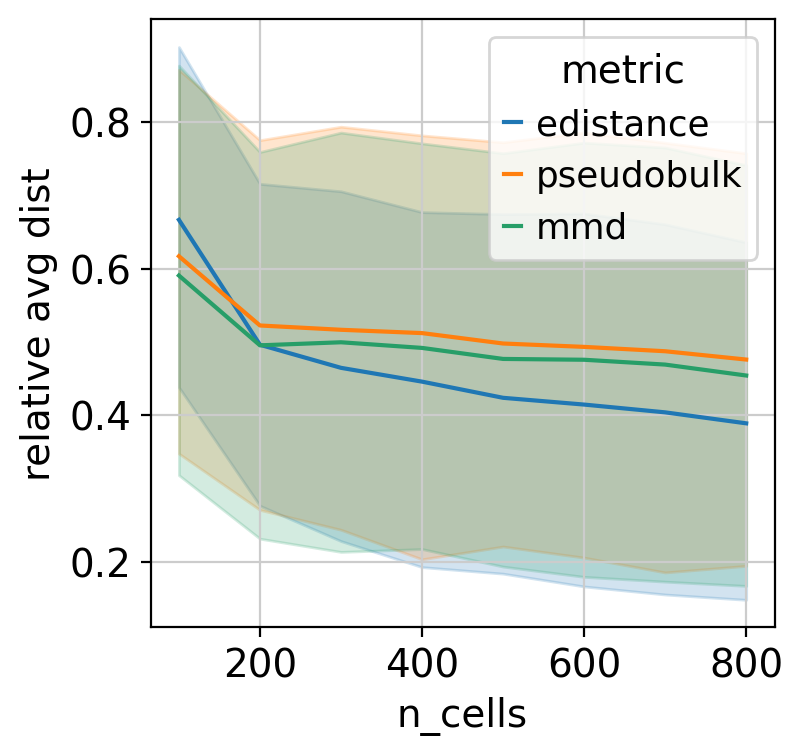

In [36]:
sns.lineplot(data=normalize_per_metric(melted_df), x='n_cells', y='avg_dist', hue='metric')
plt.ylabel('relative avg dist');

Hmmm... why does it look like this...? the variation is way too low

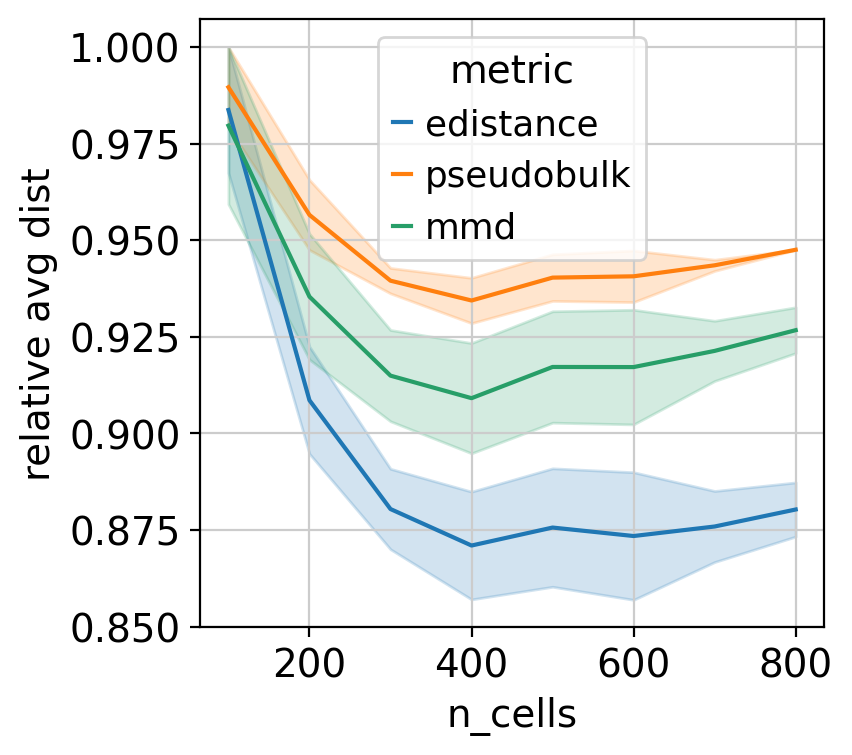

In [243]:
sns.lineplot(data=normalize_per_metric(melted_df), x='n_cells', y='avg_dist', hue='metric')
plt.ylabel('relative avg dist');

With randomly selected groups:

Text(0, 0.5, 'relative avg dist')

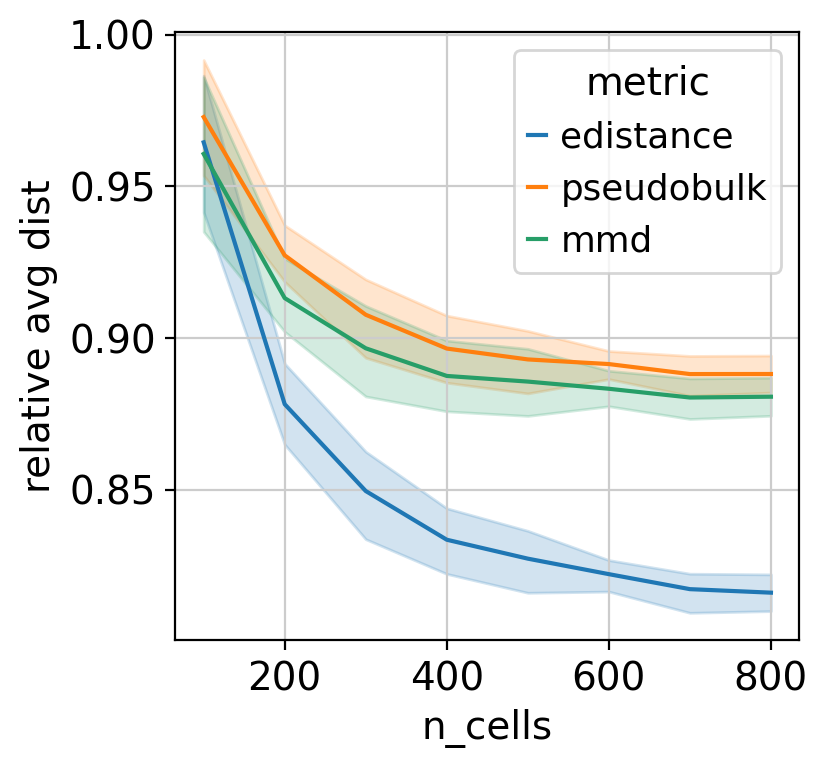

In [65]:
sns.lineplot(data=normalize_per_metric(melted_df), x='n_cells', y='avg_dist', hue='metric')
plt.ylabel('relative avg dist')

### Distance as a factor of number of DEGs (only available for simulated data)

Use these runs to also visualize increase in distances due to number of DEGs.

First, we'll take the distance of each perturbation from control, averaged across the 5 control populations. We'll also take the average distance of a control population from each other.

In [41]:
dfs, ctrls = get_distance_per_perturbation(pwdfs, 800, metrics, controls)

control: 1.6250221252441406
control: 6.647304534912109
control: 49.400797271728514


Concatenate the individual metric dataframes and label with the parameters used to generate each simulated perturbation.

In [42]:
df = pd.concat(dfs).reset_index()
df.columns = ['perturbation', 'distance', 'metric']
for col in params.columns:
    df[col] = df['perturbation'].map(dict(zip(adata.obs.perturbation, adata.obs[col])))

Plot how the distances vary with number of differentially expressed genes (`DEProb`) and degree of differential expression (`FacLoc`).

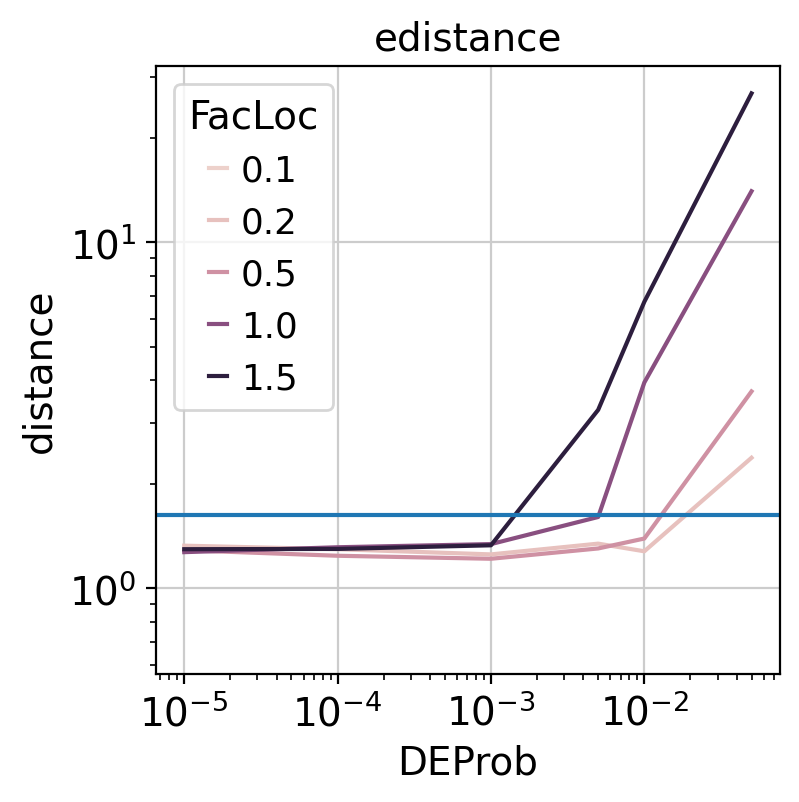

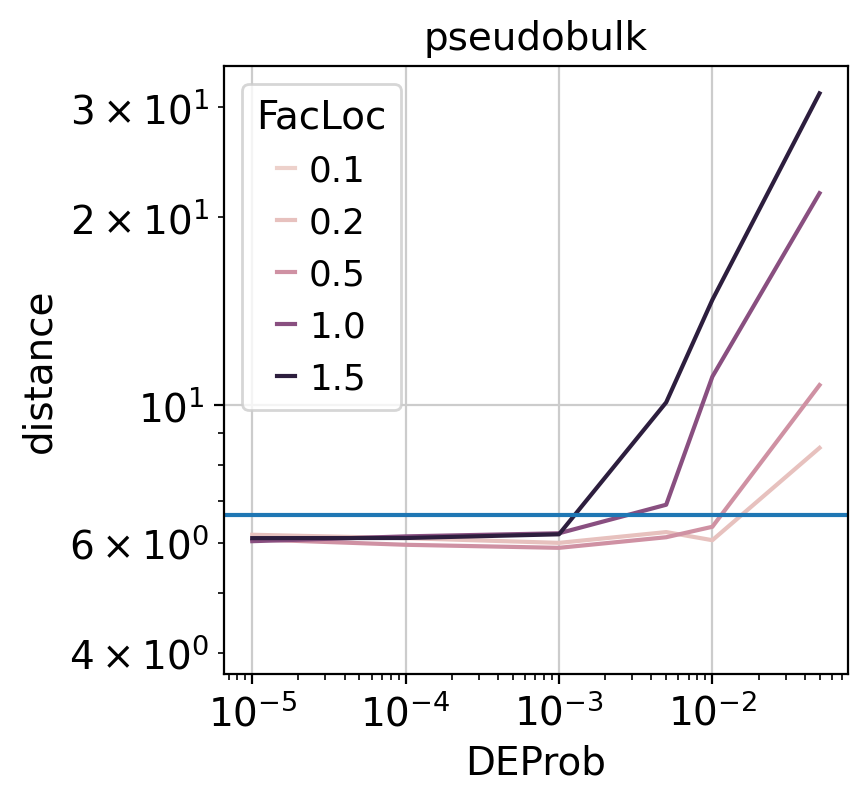

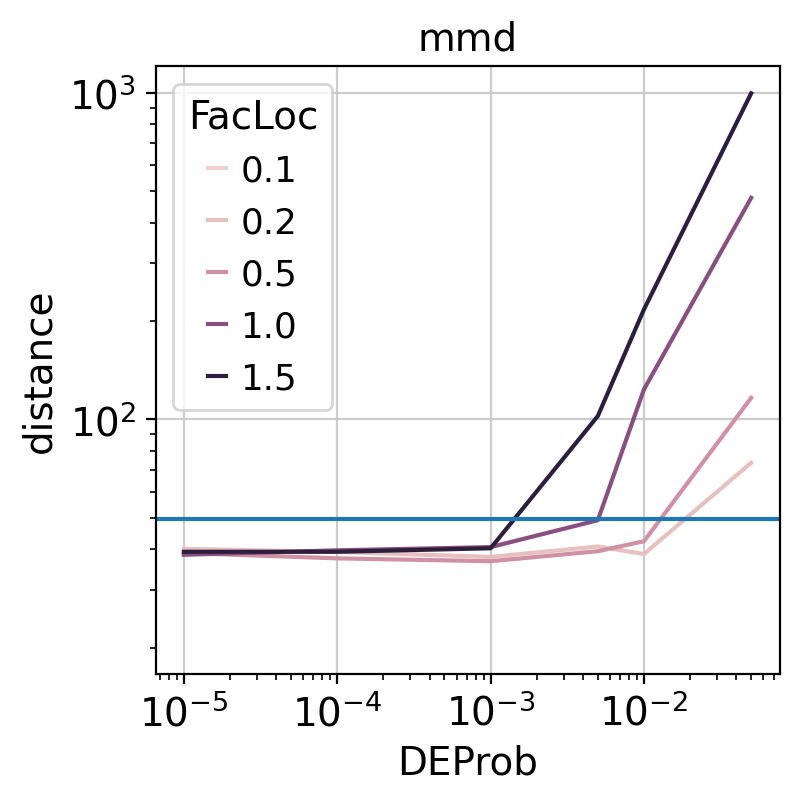

In [43]:
for metric in metrics:    
    sns.lineplot(data = df[df.metric == metric], x='DEProb', y='distance', hue='FacLoc')
    plt.axhline(ctrls[metric])

    plt.xscale('log')
    plt.yscale('log')
    plt.title(metric)
    plt.show()

Something's going wrong here... the lines should not all have the same behavior.

Finally and most importantly, the relative differences of perturbations with each other changes as `DEProb` and `FacLoc` change, and this relative difference is (should be) different per metric.

In [44]:
add_rank_col(df, dfs[0])

In [45]:
df['log(DEProb)'] = np.log(df['DEProb'])

TODO: why are the Deprobs here different?? I set them to be all the same

Text(0, 0.5, 'scaled distance')

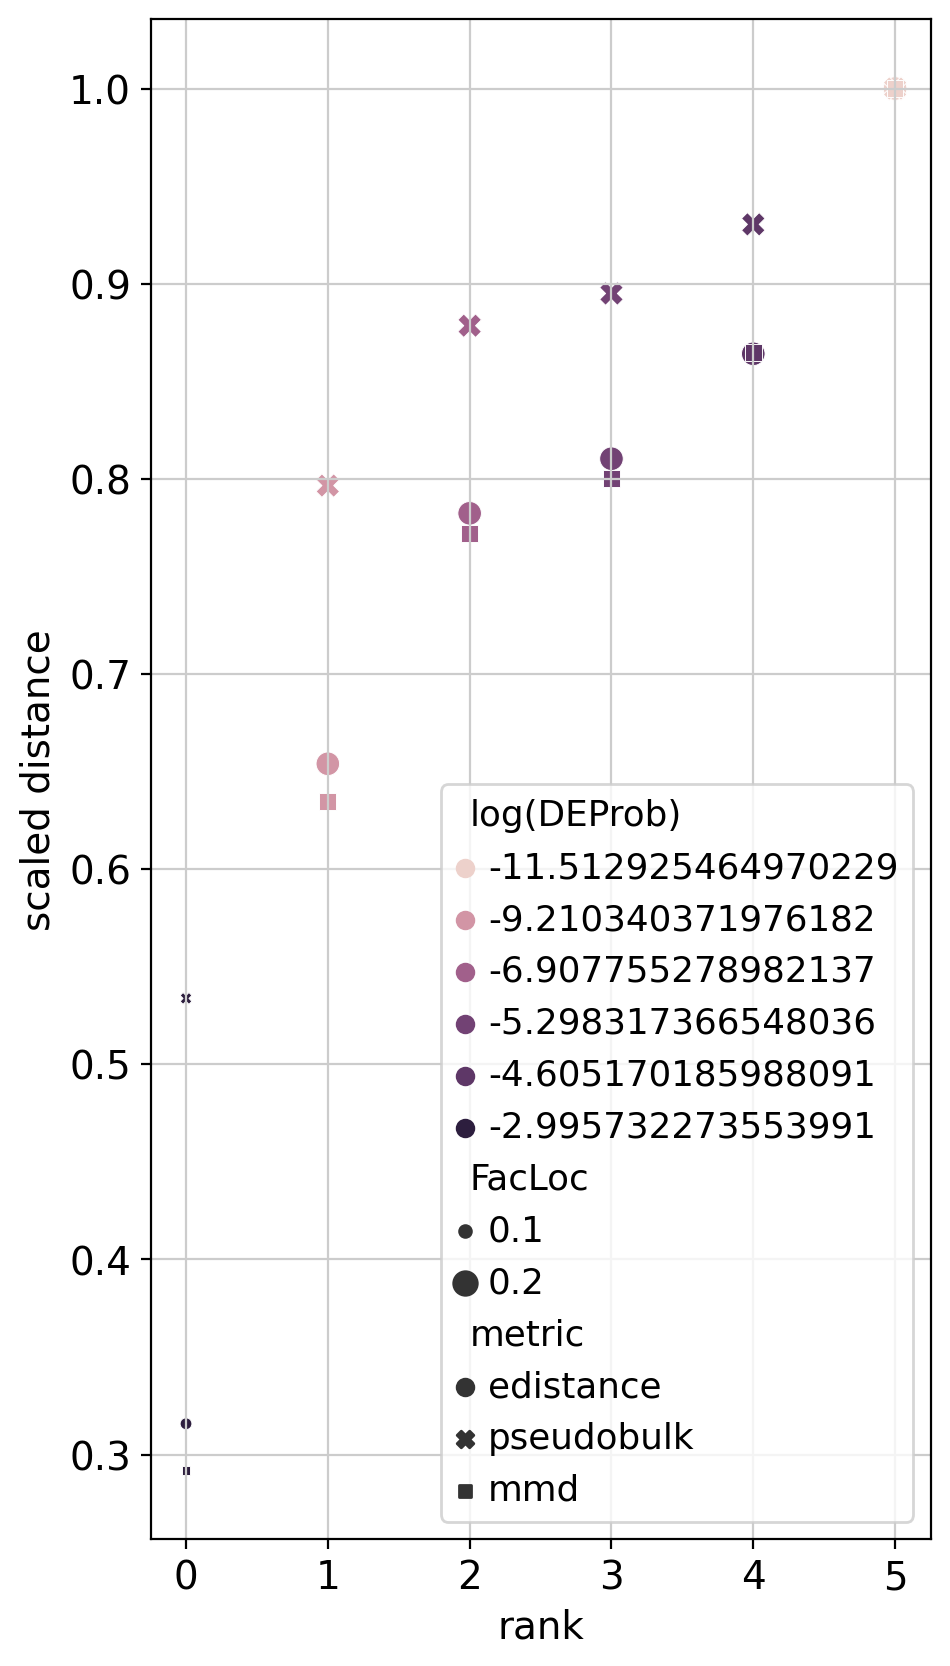

In [312]:
normed_df = normalize_per_metric(df, label='distance')

plt.figure(figsize=(5, 10))
sns.scatterplot(data=normed_df, x='rank', y='distance', style='metric', hue='log(DEProb)', size='FacLoc')
# for i, row in normed_df[normed_df.perturbation == 'control'].iterrows():
#     plt.axhline(row['distance'], label=row['metric'])
plt.ylabel('scaled distance')

Text(0, 0.5, 'scaled distance')

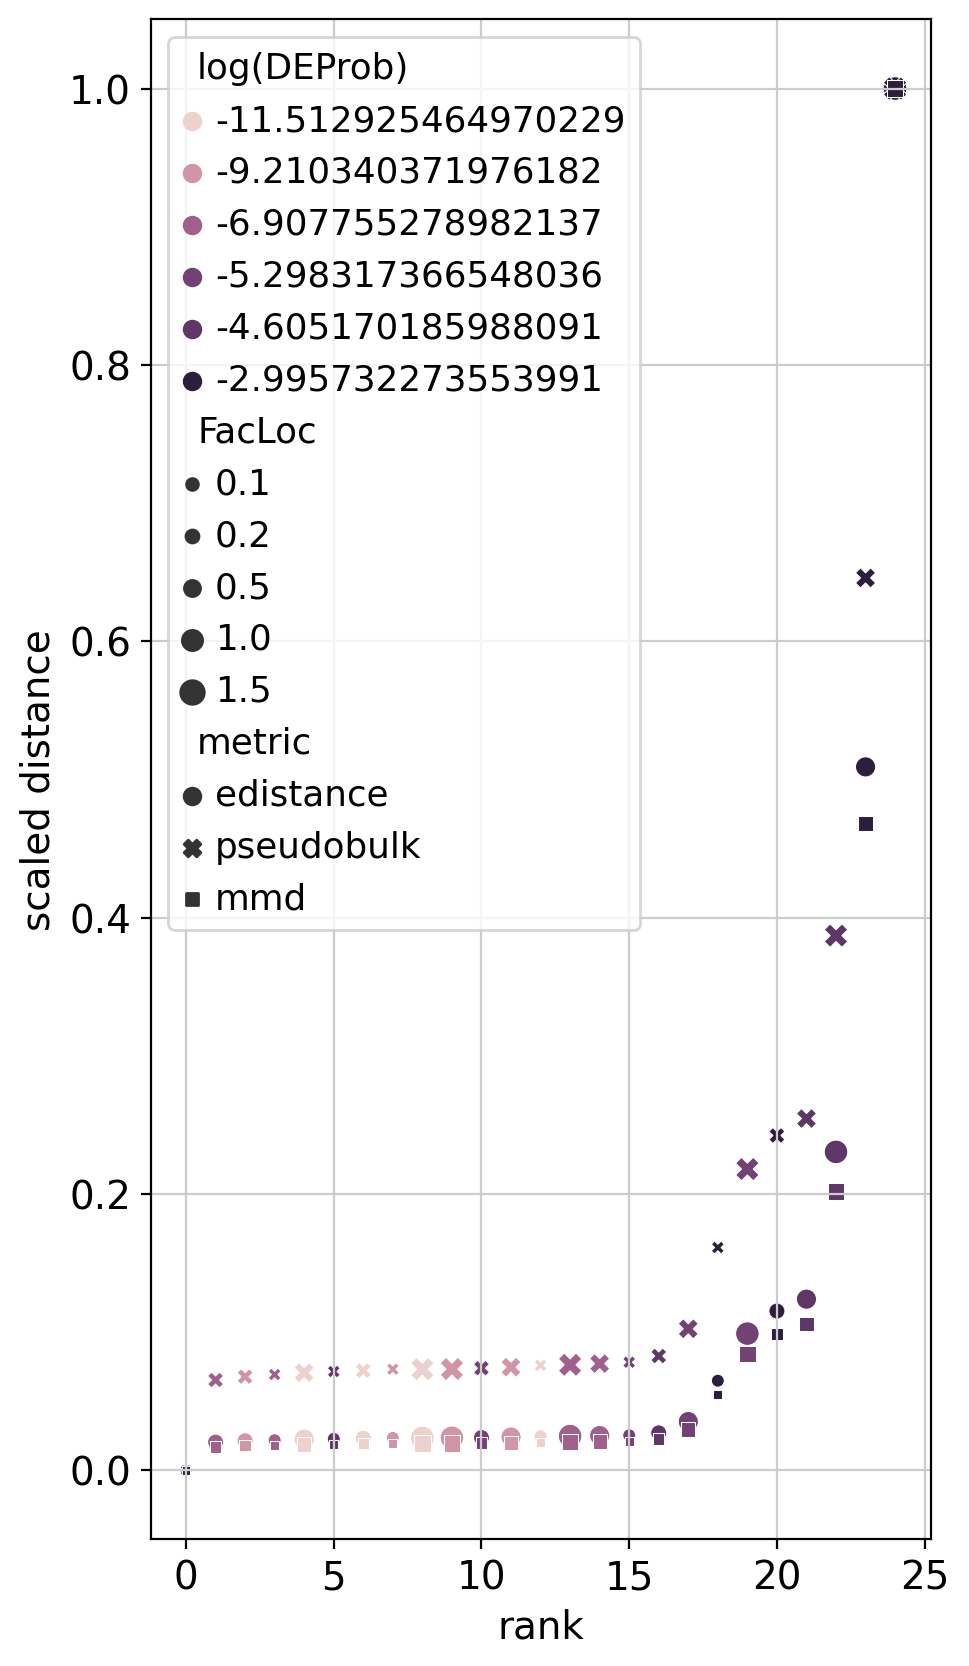

In [46]:
normed_df = normalize_per_metric(df, label='distance')

plt.figure(figsize=(5, 10))
sns.scatterplot(data=normed_df, x='rank', y='distance', style='metric', hue='log(DEProb)', size='FacLoc')
# for i, row in normed_df[normed_df.perturbation == 'control'].iterrows():
#     plt.axhline(row['distance'], label=row['metric'])
plt.ylabel('scaled distance')

## run metrics for different numbers of features

How does the number of HVGs selected impact these metrics? We'll also look at whether the different flavors of HVG selection offered by `scanpy` matter here.

In [47]:
adata

AnnData object with n_obs × n_vars = 40000 × 10000
    obs: 'Cell', 'Batch', 'Group', 'ExpLibSize', 'Step', 'group', 'Prob', 'DEProb', 'DownProb', 'FacLoc', 'FacScale', 'Steps', 'Skew', 'log(DEProb)', 'perturbation', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden_colors', 'Group_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

We'll select the HVGs from the original 10k, while including all conditions, including those that might not have enough cells.

In [48]:
experiment_condi = [10, 50, 100, 500, 1000, 5000]  # number of HVGs

feature_subsets = {}
for n in experiment_condi:
    sc.pp.highly_variable_genes(adata, n_top_genes=n, flavor='seurat')
    feature_subsets[n] = list(adata.var_names[adata.var['highly_variable']])

We'll still produce 5 control conditions to average over so that we get a distribution of metric values.

In [49]:
merged = sample_and_merge_control(adata, adata[adata.obs.perturbation == 'control'])

Filter for conditions with a minimum of 250 cells, which we see from the above plot has a reasonable amount of variance in the metric. 

In [50]:
merged = sample_and_merge_control(adata, adata[adata.obs.perturbation == 'control'])

filtered = remove_groups(merged, min_cells=250)
filtered.obs_names_make_unique()

In [51]:
filtered = subsample(filtered, 50)  # TODO remove, temporary for speedup

In [52]:
filtered.obs.perturbation.value_counts()  # need to fix why controls aren't sampled haha

Path6       50
Path18      50
control2    50
control0    50
control1    50
control4    50
Path19      50
Path22      50
Path4       50
Path9       50
Path12      50
Path3       50
Path25      50
Path20      50
Path5       50
Path13      50
Path16      50
Path7       50
Path24      50
Path11      50
Path8       50
control     50
Path10      50
Path2       50
Path17      50
Path23      50
Path21      50
Path14      50
Path15      50
control3    50
Name: perturbation, dtype: int64

Calculate metrics for each perturbation.

In [53]:
# globals, delete in future
controls = ['control0', 'control1', 'control2', 'control3', 'control4']
metrics = ["edistance", 'pseudobulk', 'mmd', 'wasserstein']

In [ ]:
pwdfs = {}
ctrls = {}
for n, features in feature_subsets.items():
    subset = filtered[:, features]
    ## because some metrics run on PCA space, we also have to rerun PCA here
    sc.pp.pca(subset, use_highly_variable=False)  # uses all genes
    
    for metric in metrics:
        print(metric)

        distance = pt.tools.Distance(metric=metric)
        pwdf = distance.pairwise(subset, groupby='perturbation')
        
        pwdfs[metric + '_' + str(n)] = pwdf
        
        ## Get average distance of control to control (exclude diagonal) ##
        ctrl_ctrl = pwdf.loc[controls, controls]
        ctrl_dist = ctrl_ctrl.sum().sum() / (25 - 5) 
        ctrls[metric + '_' + str(n)] = ctrl_dist

        print("control:", ctrl_dist)

Output()

edistance


Output()

control: 0.2499415397644043
pseudobulk


Output()

control: 0.994248378276825
mmd


Output()

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)

control: 1.0287098109722137
wasserstein


Aggregate pairwise distances into a melted distance dataframe.

In [ ]:
melted_df = get_flat_df(pwdfs, controls, label='n_genes')

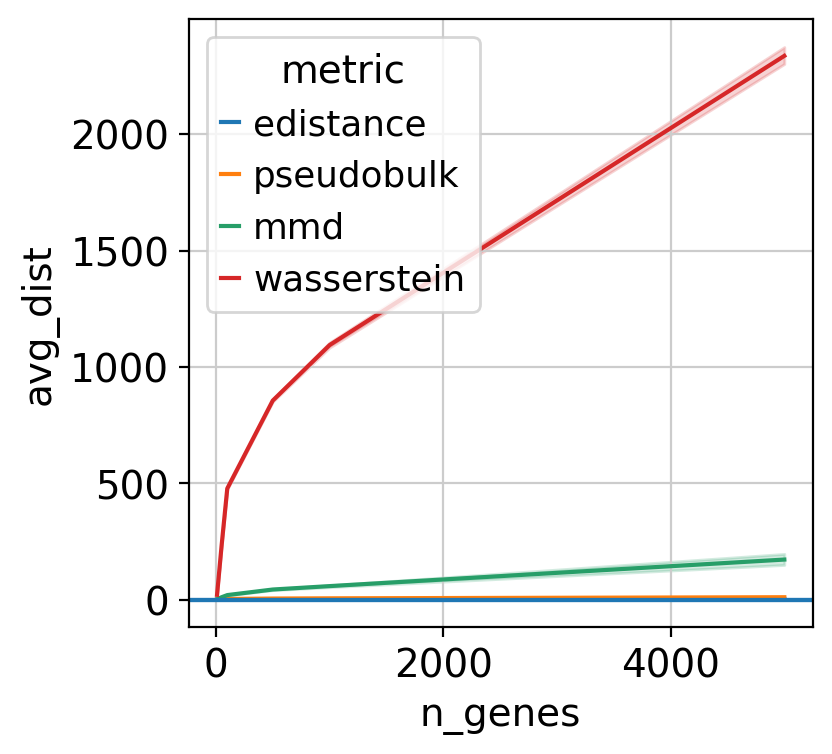

In [58]:
sns.lineplot(data=melted_df, x='n_genes', y='avg_dist', hue='metric')
plt.axhline(ctrls['edistance_10'])
plt.axhline(ctrls['pseudobulk_10'])

Text(0, 0.5, 'relative ave dist')

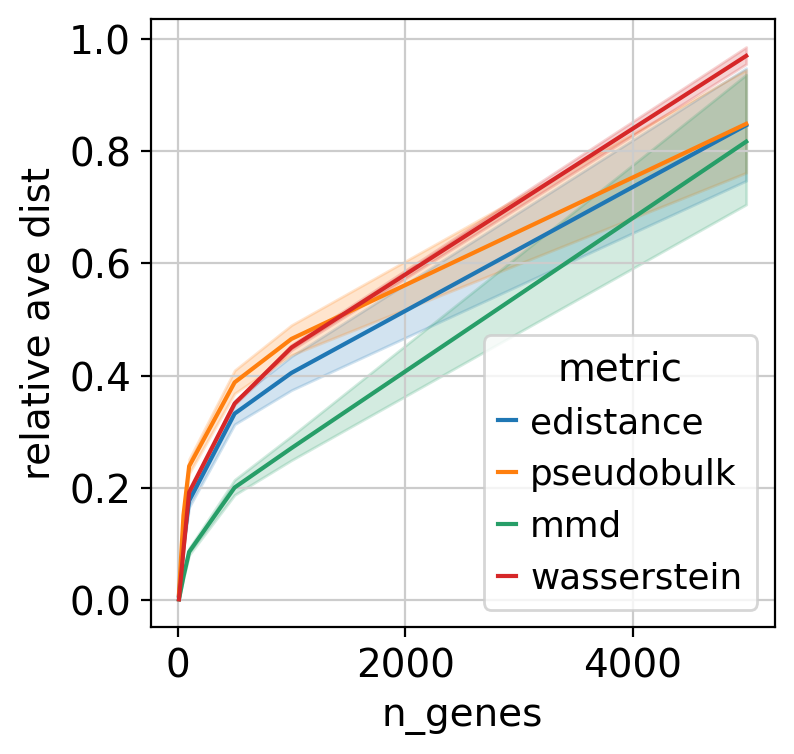

In [59]:
sns.lineplot(data=normalize_per_metric(melted_df), x='n_genes', y='avg_dist', hue='metric')
plt.ylabel('relative ave dist')

## run metrics for different percentages of mislabeled cells, representing a typical CRISPR experiment

Set skew to .01 as well?

## sparsity

How does library size/sparsity affect these metrics?

In [378]:
log_library_sizes = np.array(range(83, 94, 2))/10

This one is a bit different from the above, as we load in several adatas.

In [379]:
# global settings
controls = ['control0', 'control1']# , 'control2', 'control3', 'control4']
metrics = ["edistance",'pseudobulk','mmd'] #wasserstein

In [380]:
adatas = {}
for libsize in log_library_sizes:
    a = ad.AnnData(pd.read_csv(f'../{libsize}-sparsity_sim.csv').T, obs=pd.read_csv(f'../{libsize}-sparsity_sim_obs.csv'))
    a.obs['libsize'] = libsize
    
    ## setup functions above
    annotate(a, pd.read_csv(f'../{libsize}-sparsity_sim_params.csv'))
    scanpy_setup(a)
    ctrl_categories_setup(a, resolution=.75)

    adatas[libsize] = a

0    1916
1    1831
2    1226
3     717
4     350
Name: leiden, dtype: int64
0    2094
1    2055
2     860
3     749
4     282
Name: leiden, dtype: int64
0    2087
1    1960
2    1257
3     736
Name: leiden, dtype: int64
0    1973
1    1952
2    1142
3     540
4     433
Name: leiden, dtype: int64
0    2154
1    2020
2    1604
3     262
Name: leiden, dtype: int64
0    2343
1    1644
2    1452
3     601
Name: leiden, dtype: int64


Set the number of cells per condition to 700 (stable) and calculate the distance for each perturbation, per metric per adata.

In [381]:
distance_dfs = {}
for libsize, a in adatas.items():
    print(libsize)
    ## get distance dfs for the set of perturbations in each adata
    ncell = 700
    merged = sample_and_merge_control(a, a[a.obs.perturbation == 'control'], n=3)
    filtered = subsample(remove_groups(merged, min_cells=40), ncell)
    filtered.obs_names_make_unique()

    pwdfs = {}
    for metric in metrics:
        subset = generate(ncell, filtered, min_cells=ncell)

        distance = pt.tools.Distance(metric=metric)
        pairwise_df = distance.pairwise(subset, groupby='perturbation')

        pwdfs[metric + '_' + str(ncell)] = pairwise_df
    
    ## calculate control cutoff
    dfs, _ = get_distance_per_perturbation(pwdfs, n=ncell)  # TODO why is this line still returning controls
    # concatenate dfs
    df = pd.concat(dfs).reset_index()
    df.columns = ['perturbation', 'distance', 'metric']
    
    add_rank_col(df, dfs[0])
    
    distance_dfs[libsize] = df

8.3


Output()

Output()

Output()

control: 0.2966827392578125
control: 1.0564582824707032
control: 11.161041259765625
8.5


Output()

Output()

Output()

control: 0.31898651123046873
control: 1.0844274520874024
control: 11.759829711914062
8.7


Output()

Output()

Output()

control: 0.3088981628417969
control: 1.059555435180664
control: 11.226577758789062
8.9


Output()

Output()

Output()

control: 0.3720958709716797
control: 1.1546236991882324
control: 13.331559753417968
9.1


Output()

Output()

Output()

control: 0.3440380096435547
control: 1.0959697723388673
control: 12.011498260498048
9.3


Output()

Output()

Output()

control: 0.32176513671875
control: 1.0408083915710449
control: 10.83282012939453


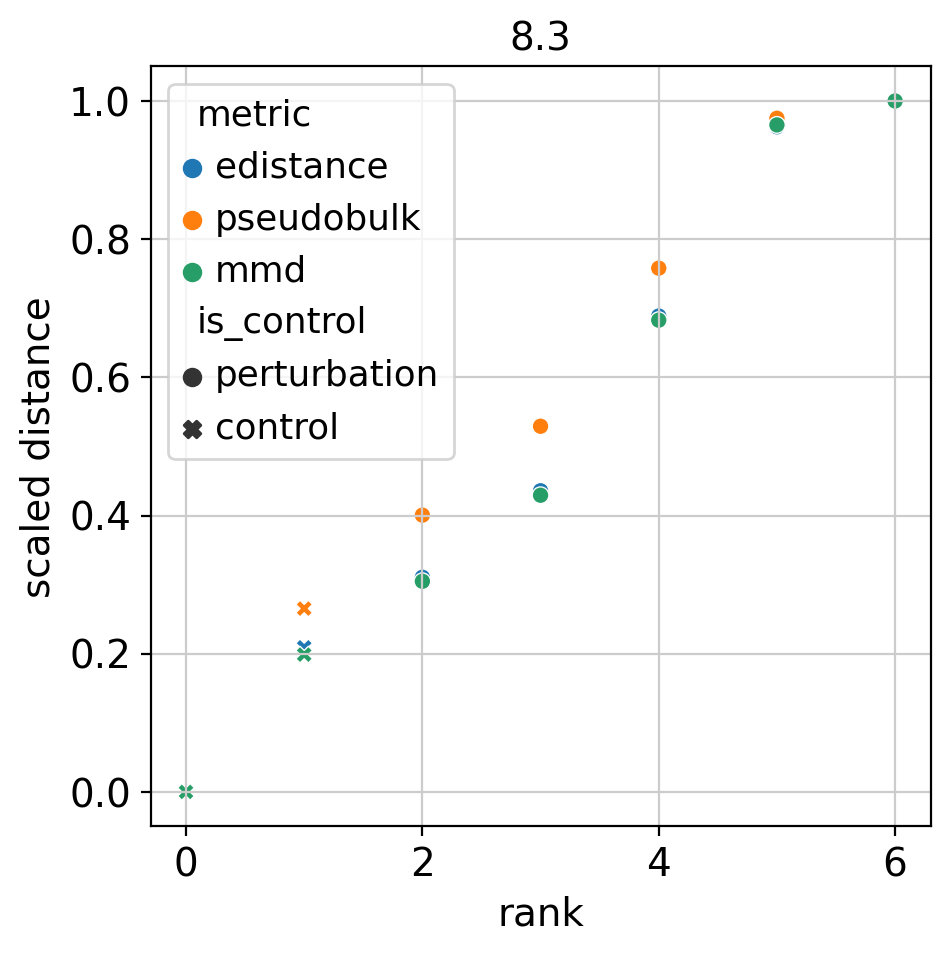

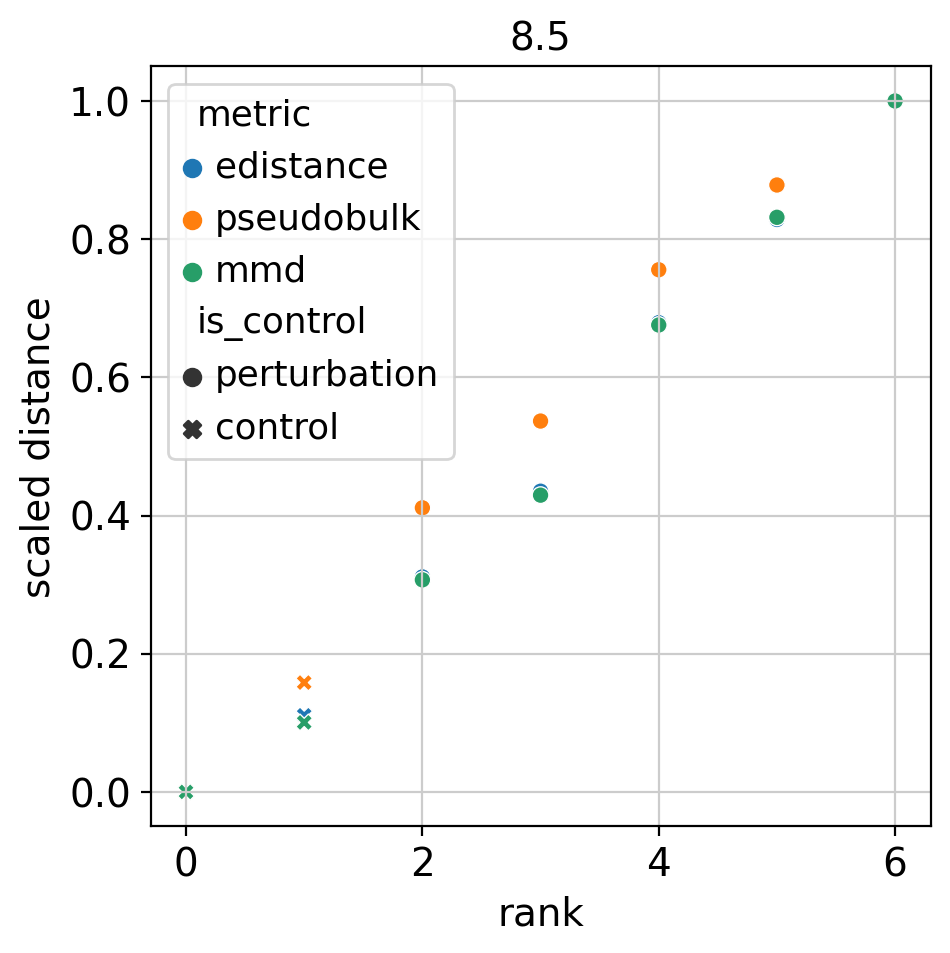

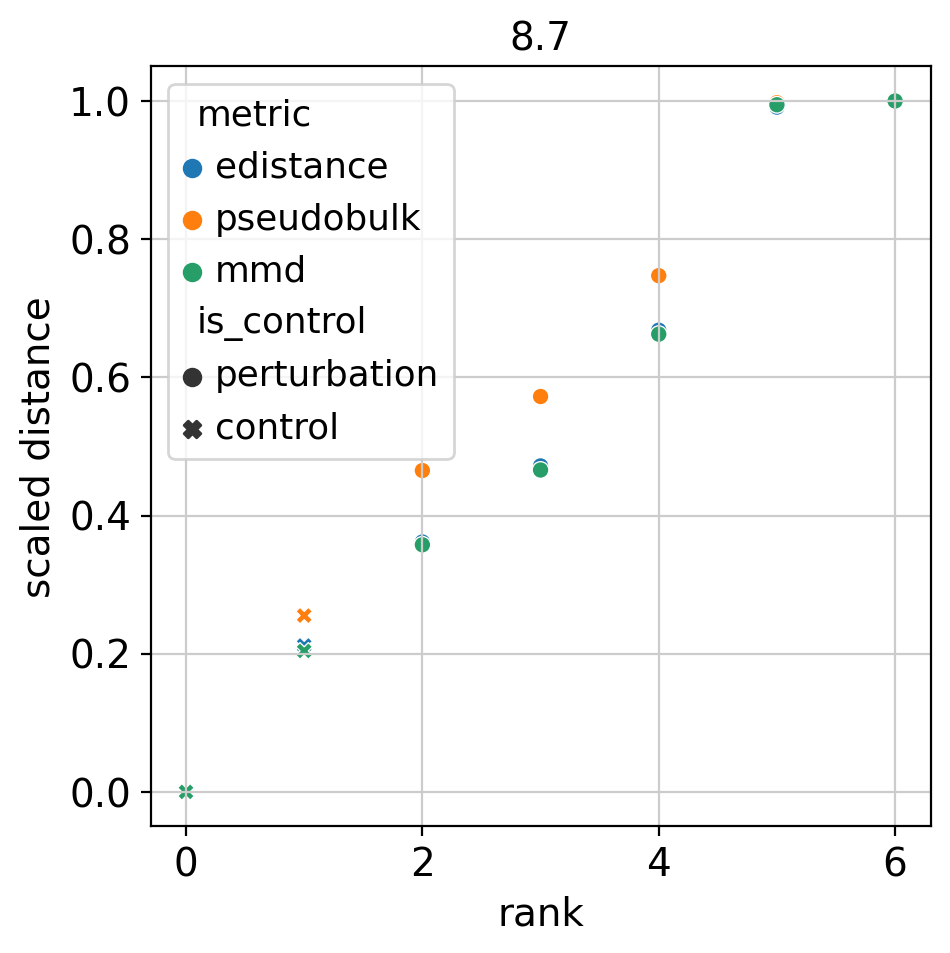

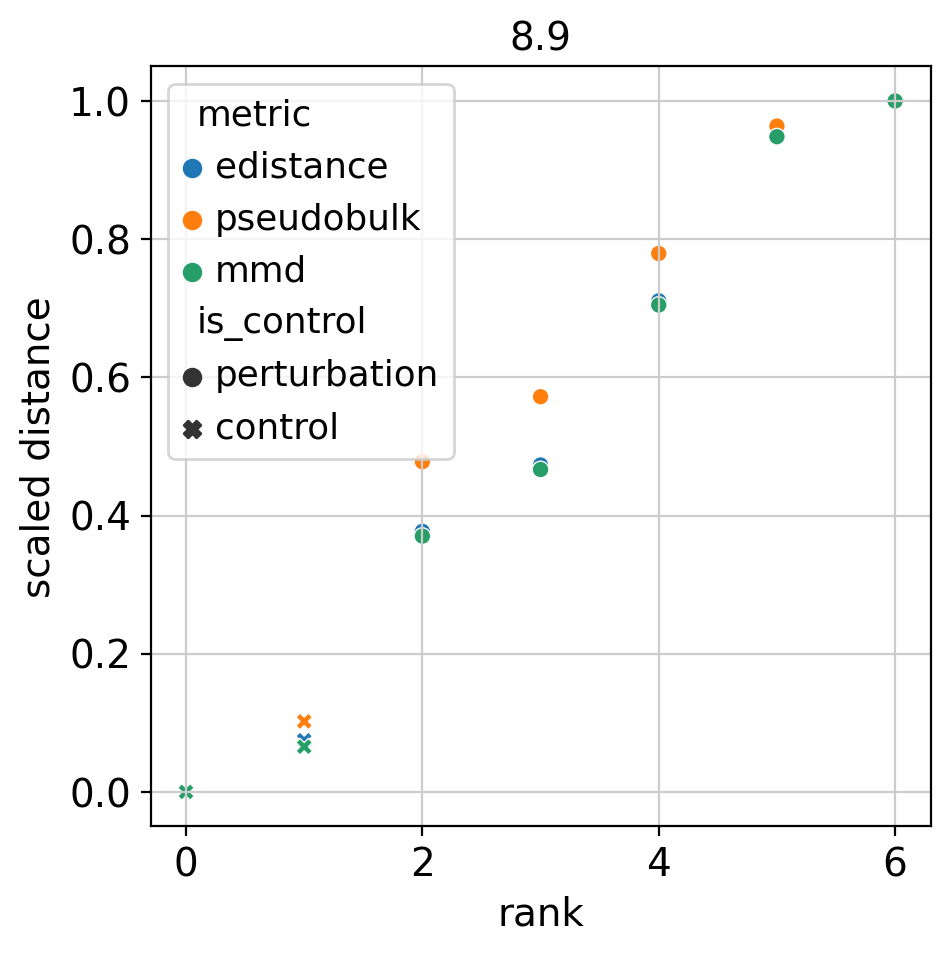

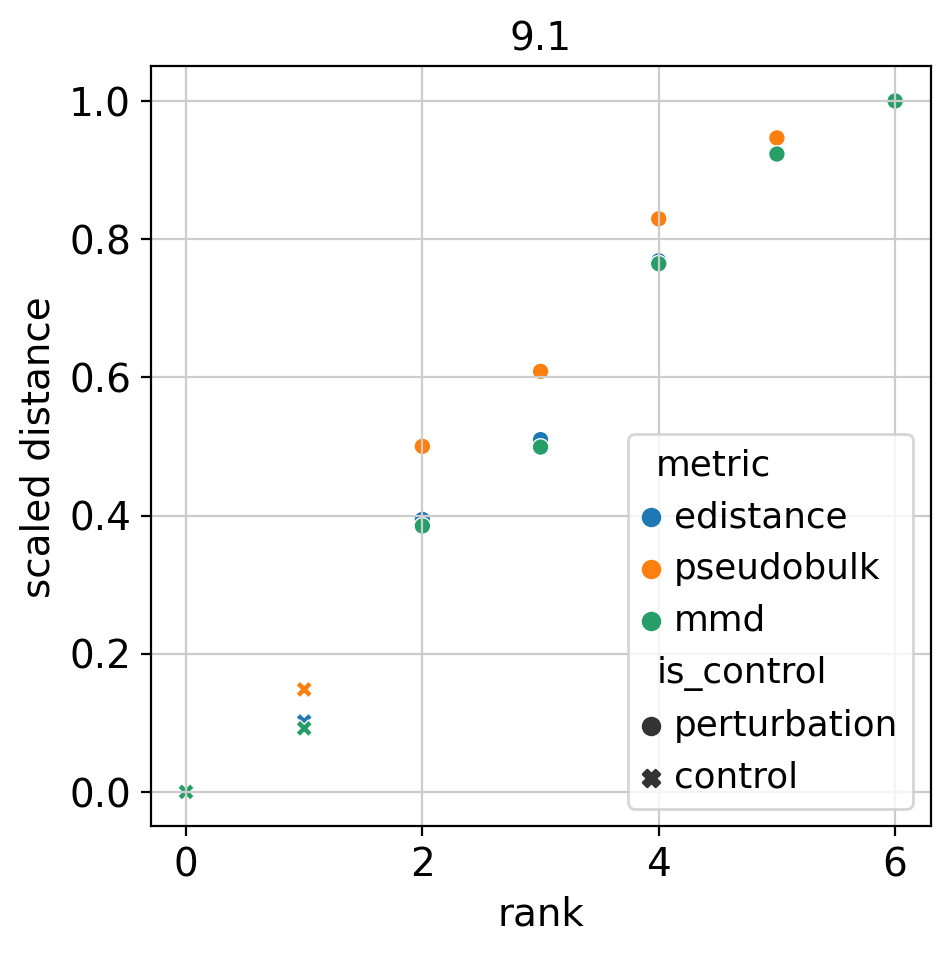

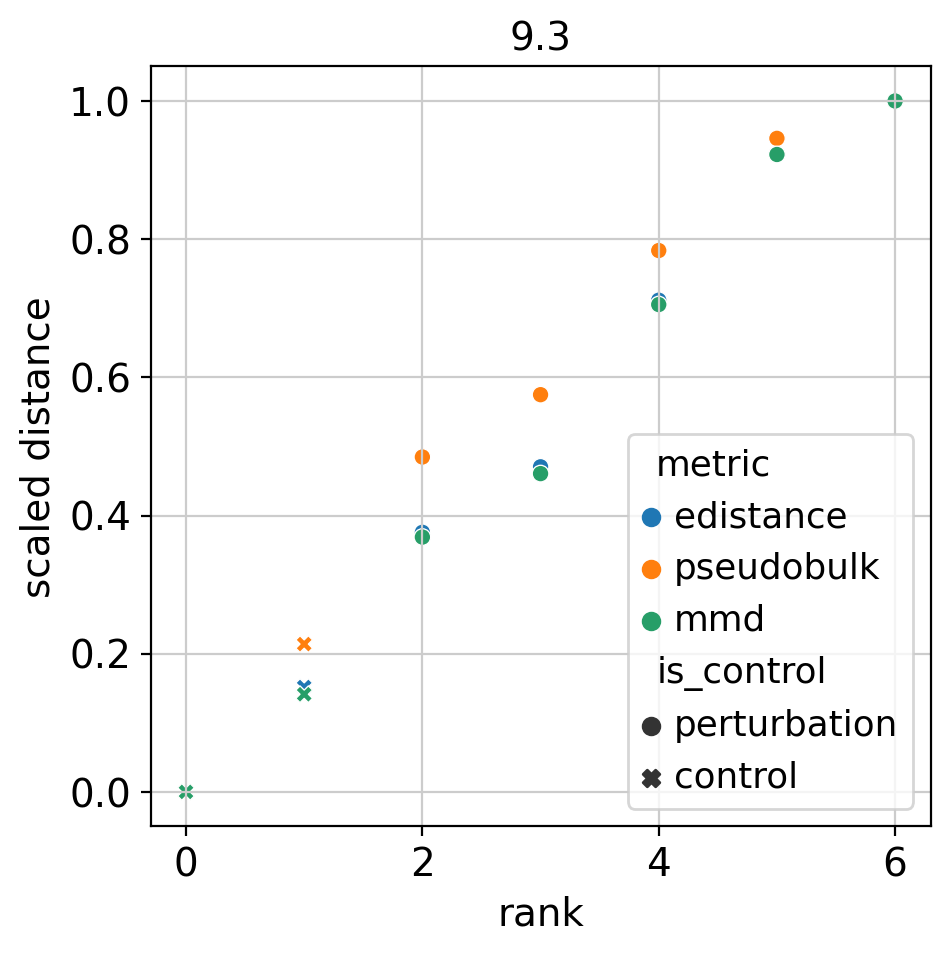

In [382]:
for libsize, df in distance_dfs.items():    
    plt.figure(figsize=(5, 5))
    sns.scatterplot(data=normalize_per_metric(df, label='distance'), x='rank', y='distance', hue='metric', style='is_control')
    # for i, row in normed_df[normed_df.perturbation == 'control'].iterrows():
    #     plt.axhline(row['distance'], label=row['metric'])
    plt.ylabel('scaled distance')
    plt.title(libsize)
    plt.show()